In [12]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
#importing train data
data=pd.read_excel(r'C:\Users\Joshua\Downloads\train1.xlsx')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [15]:
#To check missing values
print(data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [16]:
#check datatype in each column
print("Column datatypes:")
print(data.dtypes)


Column datatypes:
ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
train= data.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(train)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    0        1          3        0     1933        0     0   
1      40576   31   11        1          1        0        3        0     0   
2      15320   27    7        1          1        0      891        1     0   
3      43962   57    4        0          2        0     3287        0     0   
4      29842   31    9        1          1        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29    4        2          2        0        0        1     0   
31643  40178   53    4        0          2        0      380        0     1   
31644  19710   32    4        2          2        0      312        0     0   
31645  38556   57    9        1          1        0      225        1     0   
31646  14156   55    4        0          1        0      204        1     0   

       contact  day  month  duration  campaign  pda

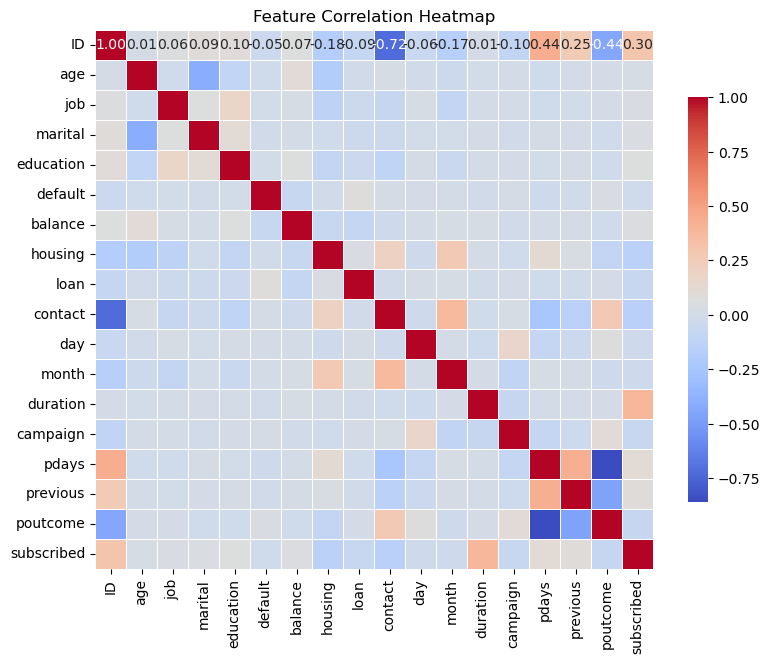

In [30]:
# Create a DataFrame
df = pd.DataFrame(train)

# Ensure the DataFrame contains only numeric types
df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Handle NaN values in the correlation matrix (if any)
corr_matrix = corr_matrix.fillna(0)  # Replace NaN with 0 or some other value

# Create the heatmap
plt.figure(figsize=(9, 7))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, 
            linewidths=0.5, cbar_kws={"shrink": 0.75})

# Customize the plot
plt.title('Feature Correlation Heatmap')
plt.show()

In [24]:
#logistic regression model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the independent variables (features) and the dependent variable (target)
x = train.drop('subscribed', axis=1)
y= train['subscribed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x=sc.transform(x)


# Create an instance of Logistic Regression class
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit the model with data
log_reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.8902053712480252

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5599
           1       0.56      0.23      0.33       731

    accuracy                           0.89      6330
   macro avg       0.73      0.60      0.63      6330
weighted avg       0.87      0.89      0.87      6330


Confusion Matrix:
 [[5466  133]
 [ 562  169]]


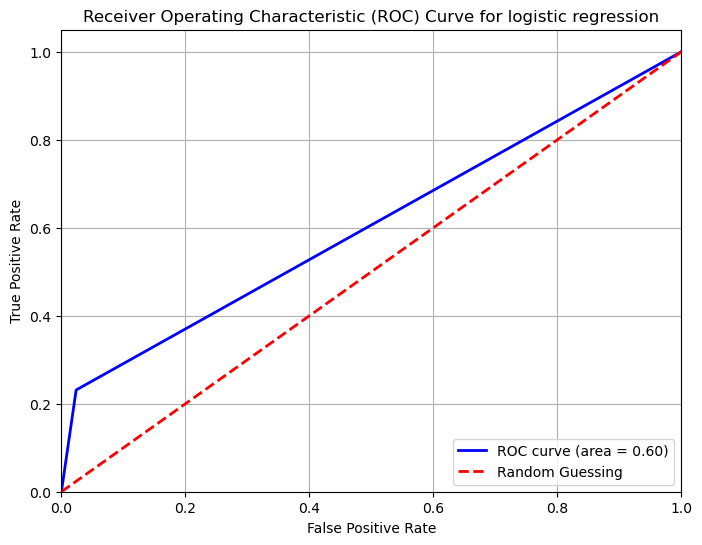

In [25]:
# Plotting ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for logistic regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

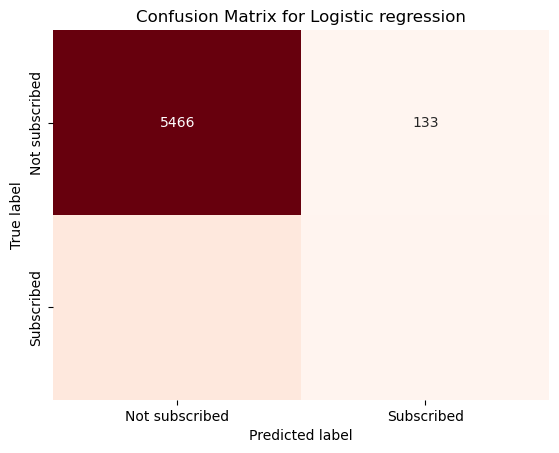

In [26]:

import seaborn as sns
# Assuming y_true and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
 # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not subscribed', 'Subscribed'],
            yticklabels=['Not subscribed', 'Subscribed'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

In [27]:
#Interpretation:

#Class 0: The model performs well with a high recall (97%) and precision (91%), indicating it is very effective at identifying class 0.
#Class 1: The model has lower performance with a recall of 24% and precision of 55%, meaning it struggles to identify class 1 correctly. This may indicate class imbalance or insufficient representation of class 1.

In [28]:
# Define cross-validation strategy
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(log_reg, x, y, cv=cv, scoring='accuracy')  # Use 'accuracy' for classification; 'neg_mean_squared_error' for regression

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.88262243 0.88135861 0.88276189 0.88212988 0.88244588]
Mean cross-validation score: 0.8823


In [29]:
cv_scores_f1 = cross_val_score(log_reg, x, y, cv=cv, scoring='f1')
print(f"Mean F1 Score: {cv_scores_f1.mean():.4f}")


Mean F1 Score: 0.0053


In [30]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# Precision
precision = cross_val_score(log_reg, x, y, cv=cv, scoring='precision')
print(f"Precision scores: {precision}")
print(f"Mean Precision score: {precision.mean():.4f}")

# Recall
recall = cross_val_score(log_reg, x, y, cv=cv, scoring='recall')
print(f"Recall scores: {recall}")
print(f"Mean Recall score: {recall.mean():.4f}")

# F1-Score
f1 = cross_val_score(log_reg, x, y, cv=cv, scoring='f1')
print(f"F1 scores: {f1}")
print(f"Mean F1 score: {f1.mean():.4f}")

Precision scores: [0.5        0.16666667 0.57142857 0.         0.4       ]
Mean Precision score: 0.3276
Recall scores: [0.00269179 0.00269179 0.00538358 0.         0.00269179]
Mean Recall score: 0.0027
F1 scores: [0.00535475 0.00529801 0.01066667 0.         0.00534759]
Mean F1 score: 0.0053


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [32]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],           # Extended range for regularization strength
    'penalty': ['l2', 'elasticnet'],                # 'l1' might be excluded if 'saga' is not used
    'solver': ['saga']                             # 'saga' is often preferred for large datasets and supports 'elasticnet'
}


In [33]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='accuracy',               # Or another scoring metric
    cv=5,                            # Number of cross-validation folds
    verbose=1,                        # Print progress
    n_jobs=-1                         # Use all available cores
)


In [34]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Joshua\anaconda

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'elasticnet'], 'solver': ['saga']},
             scoring='accuracy', verbose=1)

In [35]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8820159903072785


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


In [37]:
from scipy.stats import uniform, loguniform

param_dist = {
    'C': loguniform(1e-4, 1e2),              # Regularization strength, log-uniform distribution
    'penalty': ['l1', 'l2', 'elasticnet'],   # Type of regularization
    'solver': ['liblinear', 'saga']          # Optimization algorithm
}


In [38]:
# Initialize Random Search
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_dist,
    n_iter=100,                            # Number of parameter settings to sample
    scoring='accuracy',                    # Or another scoring metric
    cv=5,                                 # Number of cross-validation folds
    verbose=1,                             # Print progress
    n_jobs=-1                              # Use all available cores
)

In [39]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Joshua\anaconda3\Lib\site-packages\sklearn\linear_mod

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F31A1D0A90>,
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy', verbose=1)

In [40]:
# Get the best parameters and model
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_model = random_search.best_estimator_


Best Parameters: {'C': 2.9926542674407717, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8989215349471852


In [41]:
#importing test data
data1=pd.read_excel('C:\\Users\\Joshua\\Downloads\\test1.xlsx')
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [42]:
#To check missing values
print(data1.isnull().sum())

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label encoding
test= data1.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
print(test)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
1      40403   78    5        0          0        0     2787        0     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
4      12527   45    1        0          1        0     -705        0     1   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   
13563  34839   29    0        1          1        0        2        1     0   

       contact  day  month  duration  campaign  pda

In [57]:
test_pred = best_model.predict(test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
submissions = pd.DataFrame()

In [59]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [60]:
submissions['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    0
13563    0
Name: subscribed, Length: 13564, dtype: int32

In [61]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [62]:
submissions['subscribed']

0        no
1        no
2        no
3        no
4        no
         ..
13559    no
13560    no
13561    no
13562    no
13563    no
Name: subscribed, Length: 13564, dtype: object

In [64]:
submissions.to_csv(' logistic submission file.csv', header=True, index=False)

In [44]:
import numpy as np
import pandas as pd


# Example: Assume `new_clients_df` is your DataFrame with new client data
# new_clients_df = pd.read_csv('new_clients.csv')

# Ensure the new data is preprocessed in the same way as the training data
# Apply any encoding, scaling, etc., here

# Predict the likelihood of subscription
subscription_probabilities = best_model.predict_proba(test)[:, 1]  # Get probabilities for the positive class (subscribed)

# If you want binary predictions:
subscription_predictions = best_model.predict(test)



In [50]:

# Save the probabilities or predictions
output_prob = pd.DataFrame({'ID': test['ID'], 'Subscription_Likelihood': subscription_probabilities})
output_prob.to_csv('subscription_likelihoods.csv', index=False)

output_pred = pd.DataFrame({'ID': test['ID'], 'Subscription_Prediction': subscription_predictions})
output_pred.to_csv('subscription_predictions.csv', index=False)

print("Predictions and likelihoods have been saved.")


Predictions and likelihoods have been saved.


In [54]:
output_pred['Subscription_Prediction'].replace(0,'no',inplace=True)
output_pred['Subscription_Prediction'].replace(1,'yes',inplace=True)

In [55]:
import pandas as pd

# Load the saved CSV files
output_prob = pd.read_csv('subscription_likelihoods.csv')
output_pred = pd.read_csv('subscription_predictions.csv')

# Display the first few rows of each DataFrame
print("Subscription Likelihoods:")
print(output_prob.head())  # Display the first 5 rows of the likelihoods




Subscription Likelihoods:
      ID  Subscription_Likelihood
0  38441                 0.044238
1  40403                 0.459601
2   3709                 0.055055
3  37422                 0.066320
4  12527                 0.014981


In [56]:
print("\nSubscription Predictions:")
print(output_pred.head())  # Display the first 5 rows of the predictions


Subscription Predictions:
      ID  Subscription_Prediction
0  38441                        0
1  40403                        0
2   3709                        0
3  37422                        0
4  12527                        0
